<a href="https://colab.research.google.com/github/tom2rd/textmining/blob/master/Arashi_Lyrics_Janome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 嵐の曲の歌詞をJanomeとWordCloudで頻度を出す

このエントリーを、Google Colabで動かせるようにしました。

https://qiita.com/yuuuusuke1997/items/122ca7597c909e73aad5

最初のスクレイピングに時間がかかりますので、ちょっと時間がある時にやってみてくださいませ。

In [0]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

#スクレイピングしたデータを入れる表を作成
list_df = pd.DataFrame(columns=['歌詞'])

for page in range(1, 3):
    #曲ページ先頭アドレス
    base_url = 'https://www.uta-net.com'

    #歌詞一覧ページ
    url = 'https://www.uta-net.com/artist/3891/0/' + str(page) + '/'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'lxml')
    links = soup.find_all('td', class_='side td1')
    for link in links:
        a = base_url + (link.a.get('href'))

        #歌詞詳細ページ
        response = requests.get(a)
        soup = BeautifulSoup(response.text, 'lxml')
        song_lyrics = soup.find('div', itemprop='lyrics')
        song_lyric = song_lyrics.text
        song_lyric = song_lyric.replace('\n','')
        #サーバーに負荷を与えないため1秒待機
        time.sleep(1)

        #取得した歌詞を表に追加
        tmp_se = pd.DataFrame([song_lyric], index=list_df.columns).T
        list_df = list_df.append(tmp_se)

print(list_df)

#csv保存
list_df.to_csv('list.csv', mode = 'a', encoding='cp932')

                                                   歌詞
0   I'm walking round in circles　名前も知らぬ君を探し歩いた夜は　月...
0   どんな出来事にもそれなりに　そう　意味があるさこんな謎だらけの若さ早くヤメにしたいよ寝起きが...
0   存在もいつかは溶けてく　対面の先には日差しあふれ結論ばかりな超理論　まわる　まわるよ真面目に...
0   Oh love you love you your eyes with delightその瞳...
0   仕方ない　こんなものさワケ知り顔で　孤独　飲み干す奥まで　放り込んで　鍵かけてPasswor...
..                                                ...
0   もう一度　僕らは今　動き出した未来へ漕ぎ出せ　胸に想い刻み込んでつかみ取れるさ　手を伸ばせば...
0   またひとつ夜が明けて　誰の胸にも眩しい光が　差し込めば過ぎた日を思うより　新しい何か見つけた...
0   Girl, you're wonderful... wonderfulGirl, you'r...
0   密かに誰かに教えてあげたい MIND, MIND, OH MY MINDエキセントリックな　...
0   伝えたくて　伝わらなくて　時には素直になれずに泣いた季節を　越えた僕らは　今とても輝いてるよ...

[343 rows x 1 columns]


歌詞のファイルをダウンロードしておく場合は、こちら

In [0]:
from google.colab import files
files.download('list.csv')

# Janomeのインストールや簡単な使い方

https://github.com/mocobeta/janome-tutorial

In [3]:
!pip install janome

     |████████████████████████████████| 21.5MB 106kB/s 


以下は飛ばしてもいいです。　フォントをIPAゴシック使いたい場合のみ

In [5]:
!apt-get -qq -y install graphviz
!apt-get -qq -y install fonts-ipafont-gothic

Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 134923 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-18ubuntu1) ...
Selecting previously unselected package fonts-ipafont-mincho.
Preparing to unpack .../fonts-ipafont-mincho_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-mincho (00303-18ubuntu1) ...
Setting up fonts-ipafont-gothic (00303-18ubuntu1) ...
update-alternatives: using /usr/share/fonts/opentype/ipafont-gothic/ipag.ttf to provide /usr/share/fonts/truetype/fonts-japanese-gothic.ttf (fonts-japanese-gothic.ttf) in auto mode
Setting up fonts-ipafont-mincho (00303-18ubuntu1) ...
update-alternatives: using /usr/share/fonts/opentype/ipafont-mincho/ipam.ttf to provide /usr/share/fonts/truetype/fonts-japanese-mincho.ttf (fonts-japanese-mincho.ttf) in auto mode
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [4]:
!ls
!janome --version

list.csv  sample_data
janome 0.3.10


In [6]:
from janome.tokenizer import Tokenizer
import pandas as pd
import re

#list.csvファイルを読み込み
df_file = pd.read_csv('list.csv', encoding='cp932')

song_lyrics = df_file['歌詞'].tolist()

t = Tokenizer()

results = []

for s in song_lyrics:
    tokens = t.tokenize(s)

    r = []

    for tok in tokens:
        if tok.base_form == '*':
            word = tok.surface
        else:
            word = tok.base_form

        ps = tok.part_of_speech

        hinshi = ps.split(',')[0]

        if hinshi in ['名詞', '形容詞', '動詞', '副詞']:
            r.append(word)

    rl = (' '.join(r)).strip()
    results.append(rl)
    #余計な文字コードの置き換え
    result = [i.replace('\u3000','') for i in results]
    print(result)

text_file = 'wakati_list.txt'
with open(text_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(result))

["I ' m walking round in circles 名前 知る 君 探す 歩く 夜 月 灯り 眩しい どこ 隠れる 踊る ? So 始まる Story 君 角 曲がる 追いかける く 未来 一つ 道 照らす てる 黙る 感じる 気持ち もう 二度と 逢える 奇跡 I want somebody 一 度 めぐる 逢える 偶然 I need somebody 君 待つ いる 守る 生まれる 恋 気 風 乗る く 今夜 逃がす よう 君 瞳 焼きつける 壊れる 時計 針 運命 背中 蹴る I want somebody 伝える 君 未来 地図 なか I need somebody 二 人 季節 回る いる I want somebody 一 度 めぐる 逢える 偶然 I need somebody 君 待つ いる 守る 出会い 偶然 未来 手 中 君 名前 聞く ダキシメル I want somebody 伝える 君 未来 地図 なか I need somebody 二 人 季節 回る いる I want somebody 一 度 めぐる 逢える 偶然 I need somebody 君 待つ いる 守る I want somebodyI need somebodyI want somebody"]
["I ' m walking round in circles 名前 知る 君 探す 歩く 夜 月 灯り 眩しい どこ 隠れる 踊る ? So 始まる Story 君 角 曲がる 追いかける く 未来 一つ 道 照らす てる 黙る 感じる 気持ち もう 二度と 逢える 奇跡 I want somebody 一 度 めぐる 逢える 偶然 I need somebody 君 待つ いる 守る 生まれる 恋 気 風 乗る く 今夜 逃がす よう 君 瞳 焼きつける 壊れる 時計 針 運命 背中 蹴る I want somebody 伝える 君 未来 地図 なか I need somebody 二 人 季節 回る いる I want somebody 一 度 めぐる 逢える 偶然 I need somebody 君 待つ いる 守る 出会い 偶然 未来 手 中 君 名前 聞く ダキシメル I want somebody 伝える 君 未来 地図 なか I need so

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



["I ' m walking round in circles 名前 知る 君 探す 歩く 夜 月 灯り 眩しい どこ 隠れる 踊る ? So 始まる Story 君 角 曲がる 追いかける く 未来 一つ 道 照らす てる 黙る 感じる 気持ち もう 二度と 逢える 奇跡 I want somebody 一 度 めぐる 逢える 偶然 I need somebody 君 待つ いる 守る 生まれる 恋 気 風 乗る く 今夜 逃がす よう 君 瞳 焼きつける 壊れる 時計 針 運命 背中 蹴る I want somebody 伝える 君 未来 地図 なか I need somebody 二 人 季節 回る いる I want somebody 一 度 めぐる 逢える 偶然 I need somebody 君 待つ いる 守る 出会い 偶然 未来 手 中 君 名前 聞く ダキシメル I want somebody 伝える 君 未来 地図 なか I need somebody 二 人 季節 回る いる I want somebody 一 度 めぐる 逢える 偶然 I need somebody 君 待つ いる 守る I want somebodyI need somebodyI want somebody", '出来事 それなり そう 意味 ある さ 謎 だらけ 若い さ 早い ヤメ する 寝起き わるい の みる みる たぶ 火照る ( ほてる ) の わける ある 不器用 今日 行く Shake it Shake it Baby 街角 にぎやか さ のれる 困る 時 ある クツズレ せい する てる 気がかり 何 ? 聞く コンビニ 雑誌 コーナー なる 合う 他人 どうし わけ わかる やるせない さ キレ ない よう 越える こうずる 出来事 それなり そう 意味 ある さ へん 人 アクセス する れる バランス くずす そう 誰 迷子 誰 ひたむき わける ある ます いる 輝く Shake it Shake it Baby 他 ヤツ 好き 君 眼 覚める すぐ 思い出す エネルギー やせる しぼむ 今日 歯 ぐきがはれているどうしようもない せつない さ 誰 真上 降る はじめて さ がり 出来る 遠い 夏 思い出す 出来事 それなり そう 意味 ある 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



["I ' m walking round in circles 名前 知る 君 探す 歩く 夜 月 灯り 眩しい どこ 隠れる 踊る ? So 始まる Story 君 角 曲がる 追いかける く 未来 一つ 道 照らす てる 黙る 感じる 気持ち もう 二度と 逢える 奇跡 I want somebody 一 度 めぐる 逢える 偶然 I need somebody 君 待つ いる 守る 生まれる 恋 気 風 乗る く 今夜 逃がす よう 君 瞳 焼きつける 壊れる 時計 針 運命 背中 蹴る I want somebody 伝える 君 未来 地図 なか I need somebody 二 人 季節 回る いる I want somebody 一 度 めぐる 逢える 偶然 I need somebody 君 待つ いる 守る 出会い 偶然 未来 手 中 君 名前 聞く ダキシメル I want somebody 伝える 君 未来 地図 なか I need somebody 二 人 季節 回る いる I want somebody 一 度 めぐる 逢える 偶然 I need somebody 君 待つ いる 守る I want somebodyI need somebodyI want somebody", '出来事 それなり そう 意味 ある さ 謎 だらけ 若い さ 早い ヤメ する 寝起き わるい の みる みる たぶ 火照る ( ほてる ) の わける ある 不器用 今日 行く Shake it Shake it Baby 街角 にぎやか さ のれる 困る 時 ある クツズレ せい する てる 気がかり 何 ? 聞く コンビニ 雑誌 コーナー なる 合う 他人 どうし わけ わかる やるせない さ キレ ない よう 越える こうずる 出来事 それなり そう 意味 ある さ へん 人 アクセス する れる バランス くずす そう 誰 迷子 誰 ひたむき わける ある ます いる 輝く Shake it Shake it Baby 他 ヤツ 好き 君 眼 覚める すぐ 思い出す エネルギー やせる しぼむ 今日 歯 ぐきがはれているどうしようもない せつない さ 誰 真上 降る はじめて さ がり 出来る 遠い 夏 思い出す 出来事 それなり そう 意味 ある 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



["I ' m walking round in circles 名前 知る 君 探す 歩く 夜 月 灯り 眩しい どこ 隠れる 踊る ? So 始まる Story 君 角 曲がる 追いかける く 未来 一つ 道 照らす てる 黙る 感じる 気持ち もう 二度と 逢える 奇跡 I want somebody 一 度 めぐる 逢える 偶然 I need somebody 君 待つ いる 守る 生まれる 恋 気 風 乗る く 今夜 逃がす よう 君 瞳 焼きつける 壊れる 時計 針 運命 背中 蹴る I want somebody 伝える 君 未来 地図 なか I need somebody 二 人 季節 回る いる I want somebody 一 度 めぐる 逢える 偶然 I need somebody 君 待つ いる 守る 出会い 偶然 未来 手 中 君 名前 聞く ダキシメル I want somebody 伝える 君 未来 地図 なか I need somebody 二 人 季節 回る いる I want somebody 一 度 めぐる 逢える 偶然 I need somebody 君 待つ いる 守る I want somebodyI need somebodyI want somebody", '出来事 それなり そう 意味 ある さ 謎 だらけ 若い さ 早い ヤメ する 寝起き わるい の みる みる たぶ 火照る ( ほてる ) の わける ある 不器用 今日 行く Shake it Shake it Baby 街角 にぎやか さ のれる 困る 時 ある クツズレ せい する てる 気がかり 何 ? 聞く コンビニ 雑誌 コーナー なる 合う 他人 どうし わけ わかる やるせない さ キレ ない よう 越える こうずる 出来事 それなり そう 意味 ある さ へん 人 アクセス する れる バランス くずす そう 誰 迷子 誰 ひたむき わける ある ます いる 輝く Shake it Shake it Baby 他 ヤツ 好き 君 眼 覚める すぐ 思い出す エネルギー やせる しぼむ 今日 歯 ぐきがはれているどうしようもない せつない さ 誰 真上 降る はじめて さ がり 出来る 遠い 夏 思い出す 出来事 それなり そう 意味 ある 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



["I ' m walking round in circles 名前 知る 君 探す 歩く 夜 月 灯り 眩しい どこ 隠れる 踊る ? So 始まる Story 君 角 曲がる 追いかける く 未来 一つ 道 照らす てる 黙る 感じる 気持ち もう 二度と 逢える 奇跡 I want somebody 一 度 めぐる 逢える 偶然 I need somebody 君 待つ いる 守る 生まれる 恋 気 風 乗る く 今夜 逃がす よう 君 瞳 焼きつける 壊れる 時計 針 運命 背中 蹴る I want somebody 伝える 君 未来 地図 なか I need somebody 二 人 季節 回る いる I want somebody 一 度 めぐる 逢える 偶然 I need somebody 君 待つ いる 守る 出会い 偶然 未来 手 中 君 名前 聞く ダキシメル I want somebody 伝える 君 未来 地図 なか I need somebody 二 人 季節 回る いる I want somebody 一 度 めぐる 逢える 偶然 I need somebody 君 待つ いる 守る I want somebodyI need somebodyI want somebody", '出来事 それなり そう 意味 ある さ 謎 だらけ 若い さ 早い ヤメ する 寝起き わるい の みる みる たぶ 火照る ( ほてる ) の わける ある 不器用 今日 行く Shake it Shake it Baby 街角 にぎやか さ のれる 困る 時 ある クツズレ せい する てる 気がかり 何 ? 聞く コンビニ 雑誌 コーナー なる 合う 他人 どうし わけ わかる やるせない さ キレ ない よう 越える こうずる 出来事 それなり そう 意味 ある さ へん 人 アクセス する れる バランス くずす そう 誰 迷子 誰 ひたむき わける ある ます いる 輝く Shake it Shake it Baby 他 ヤツ 好き 君 眼 覚める すぐ 思い出す エネルギー やせる しぼむ 今日 歯 ぐきがはれているどうしようもない せつない さ 誰 真上 降る はじめて さ がり 出来る 遠い 夏 思い出す 出来事 それなり そう 意味 ある 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



["I ' m walking round in circles 名前 知る 君 探す 歩く 夜 月 灯り 眩しい どこ 隠れる 踊る ? So 始まる Story 君 角 曲がる 追いかける く 未来 一つ 道 照らす てる 黙る 感じる 気持ち もう 二度と 逢える 奇跡 I want somebody 一 度 めぐる 逢える 偶然 I need somebody 君 待つ いる 守る 生まれる 恋 気 風 乗る く 今夜 逃がす よう 君 瞳 焼きつける 壊れる 時計 針 運命 背中 蹴る I want somebody 伝える 君 未来 地図 なか I need somebody 二 人 季節 回る いる I want somebody 一 度 めぐる 逢える 偶然 I need somebody 君 待つ いる 守る 出会い 偶然 未来 手 中 君 名前 聞く ダキシメル I want somebody 伝える 君 未来 地図 なか I need somebody 二 人 季節 回る いる I want somebody 一 度 めぐる 逢える 偶然 I need somebody 君 待つ いる 守る I want somebodyI need somebodyI want somebody", '出来事 それなり そう 意味 ある さ 謎 だらけ 若い さ 早い ヤメ する 寝起き わるい の みる みる たぶ 火照る ( ほてる ) の わける ある 不器用 今日 行く Shake it Shake it Baby 街角 にぎやか さ のれる 困る 時 ある クツズレ せい する てる 気がかり 何 ? 聞く コンビニ 雑誌 コーナー なる 合う 他人 どうし わけ わかる やるせない さ キレ ない よう 越える こうずる 出来事 それなり そう 意味 ある さ へん 人 アクセス する れる バランス くずす そう 誰 迷子 誰 ひたむき わける ある ます いる 輝く Shake it Shake it Baby 他 ヤツ 好き 君 眼 覚める すぐ 思い出す エネルギー やせる しぼむ 今日 歯 ぐきがはれているどうしようもない せつない さ 誰 真上 降る はじめて さ がり 出来る 遠い 夏 思い出す 出来事 それなり そう 意味 ある 

In [16]:
!cat wakati_list.txt

I ' m walking round in circles 名前 知る 君 探す 歩く 夜 月 灯り 眩しい どこ 隠れる 踊る ? So 始まる Story 君 角 曲がる 追いかける く 未来 一つ 道 照らす てる 黙る 感じる 気持ち もう 二度と 逢える 奇跡 I want somebody 一 度 めぐる 逢える 偶然 I need somebody 君 待つ いる 守る 生まれる 恋 気 風 乗る く 今夜 逃がす よう 君 瞳 焼きつける 壊れる 時計 針 運命 背中 蹴る I want somebody 伝える 君 未来 地図 なか I need somebody 二 人 季節 回る いる I want somebody 一 度 めぐる 逢える 偶然 I need somebody 君 待つ いる 守る 出会い 偶然 未来 手 中 君 名前 聞く ダキシメル I want somebody 伝える 君 未来 地図 なか I need somebody 二 人 季節 回る いる I want somebody 一 度 めぐる 逢える 偶然 I need somebody 君 待つ いる 守る I want somebodyI need somebodyI want somebody
出来事 それなり そう 意味 ある さ 謎 だらけ 若い さ 早い ヤメ する 寝起き わるい の みる みる たぶ 火照る ( ほてる ) の わける ある 不器用 今日 行く Shake it Shake it Baby 街角 にぎやか さ のれる 困る 時 ある クツズレ せい する てる 気がかり 何 ? 聞く コンビニ 雑誌 コーナー なる 合う 他人 どうし わけ わかる やるせない さ キレ ない よう 越える こうずる 出来事 それなり そう 意味 ある さ へん 人 アクセス する れる バランス くずす そう 誰 迷子 誰 ひたむき わける ある ます いる 輝く Shake it Shake it Baby 他 ヤツ 好き 君 眼 覚める すぐ 思い出す エネルギー やせる しぼむ 今日 歯 ぐきがはれているどうしようもない せつない さ 誰 真上 降る はじめて さ がり 出来る 遠い 夏 思い出す 出来事 それなり そう 意味 ある さ 謎 だ

フォントは、/user/share/fontsの下のディレクトリにあります

In [10]:
!ls /usr/share/fonts/truetype

font-awesome  fonts-japanese-gothic.ttf  fonts-japanese-mincho.ttf  liberation


In [11]:
from wordcloud import WordCloud

text_file = open('wakati_list.txt', encoding='utf-8')
text = text_file.read()

#日本語のフォントパス
fpath = '/usr/share/fonts/truetype/fonts-japanese-gothic.ttf'

#無意味そうな単語除去
stop_words = ['そう', 'ない', 'いる', 'する', 'まま', 'よう', 'てる', 'なる', 'こと', 'もう', 'いい', 'ある', 'ゆく', 'れる']

wordcloud = WordCloud(background_color='white',
    font_path=fpath, width=800, height=600, stopwords=set(stop_words)).generate(text)

#画像はwordcloud.pyファイルと同じディレクトリにpng保存
wordcloud.to_file('./wordcloud.png')

In [12]:
!ls

list.csv  sample_data  wakati_list.txt	wordcloud.png


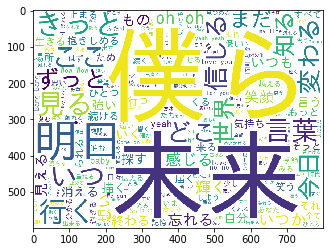

In [13]:
from PIL import Image
from matplotlib.pyplot import imshow

img = Image.open("wordcloud.png")
imshow(img)